In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#1. Load the cortex dataset located in the archive of the last course
data= pd.read_csv('Data_Cortex_Nuclear.csv')
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [2]:
#2. Fill missing entries (NaNs) in the numerical columns with 0
#am inlocuit cu fillna(), mergand pe coloane, componentele NaN cu zerouri;
#am eliminat cu 'drop' coloanele care nu erau numerice;

complet_data= data.fillna("0",axis=1)
#complet_data
featureData = complet_data.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1).values
#featureData


In [3]:
#3. Subtract the mean from each numerical column (standardize data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(featureData))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
#verific daca am obtinut intr-adevar cate medii trebuie. Si da, sunt 77, fix cate coloane are featureData.
print(featureData.shape[1])
#print(featureData.shape[0])#sunt 1080 de randuri
standardizedFeatures= StandardScaler().fit_transform(featureData)
standardizedFeatures

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.42462736 0.61538781 0.31820203 2.2908878  3.83325635 0.23252041
 0.18134132 3.5272838  0.21198345 1.42471336 0.5443877  0.31263458
 0.3170563  0.27426922 0.82351886 0.72491359 1.55762652 1.52110067
 0.44161758 0.68034139 0.3774671  0.3623473  0.17999021 1.15384311
 2.46761796 1.16934541 0.2409729  0.27102091 0.69125408 0.16794894
 0.40368385 2.11077414 0.54112733 0.45120187 0.41415718 0.7569383
 0.58356015 0.36734663 0.56374627 0.35610273 0.31493552 0.41744257
 0.39337953 0.1810801  0.9431161  0.16121102 1.70659872 0.29243411
 0.4292256  1.19742003 0.21648221 0.16663124 0.17930674 0.12152082
 0.15647754 0.1813001  0.21048921 0.12088915 0.22185096 0.12656012
 0.52734866 0.29127629 1.54834766 2.23523598 0.15982097 1.23927038
 0.84876662 0.22667649 0.12677004 0.09919962 0.12152082 0.12195213
 0.44607302 0.14134102 0.14752504 0.15407968 1.33778375]
77


array([[ 0.31618416,  0.52042534,  2.15027235, ..., -0.19417158,
        -0.25611341,  1.06590091],
       [ 0.36009334,  0.290904  ,  1.79683383, ..., -0.15328958,
        -0.2271027 ,  1.28029118],
       [ 0.33834925,  0.45351344,  1.92239433, ..., -0.17477542,
        -0.2635763 ,  1.85703831],
       ...,
       [-0.78400393, -0.86947905, -1.61470117, ...,  1.00779164,
         1.989372  ,  0.29352469],
       [-0.81384366, -0.79953248, -1.42543115, ...,  1.28079644,
         2.08966612,  0.2089962 ],
       [-0.4881888 , -0.60935676, -1.18365644, ...,  1.30150693,
         2.08892271,  0.10478825]])

In [24]:
##exemplu usor de verificat pentru codul de mai sus
#info= [[0, 0, 2], [0, 0, -1], [1, 1, 3], [1, 1, 0]]
#scaler = StandardScaler()
#print(scaler.fit(info))
#StandardScaler(copy=True, with_mean=True, with_std=True)
#print(scaler.mean_)
#print(len(info))
#print(len(info[0]))
#standardizedFeatures= StandardScaler().fit_transform(info)
#standardizedFeatures

In [38]:
#4. Select top 5 numerical features that separate the groups in the "class" column

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

numFeatures = 5
targetData = complet_data['class']
numericalData = standardizedFeatures

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)
dataset = pd.DataFrame({'Column1': best_features[:, 0], 'Column2': best_features[:, 1], 'Column3': best_features[:, 2], 'Column4': best_features[:, 3], 'Column5': best_features[:, 4]})
#best_features
dataset

,Column1,Column2,Column3,Column4,Column5
0,0.316184,0.414956,-0.609653,-0.455759,1.065901
1,0.360093,0.435484,-0.706386,-0.462039,1.280291
2,0.338349,0.384430,-0.701353,-0.315190,1.857038
3,0.069943,0.112440,-0.698464,-0.162955,1.144490
4,0.041267,0.019003,-0.753112,-0.105144,1.583530
...,...,...,...,...,...
1075,-0.679322,-0.805940,0.990941,1.598526,0.085303
1076,-0.609945,-0.792244,1.112361,1.533497,0.084215
1077,-0.784004,-0.836579,0.428707,1.594134,0.293525
1078,-0.813844,-0.907115,0.558739,1.648477,0.208996


KeyError: 'class'

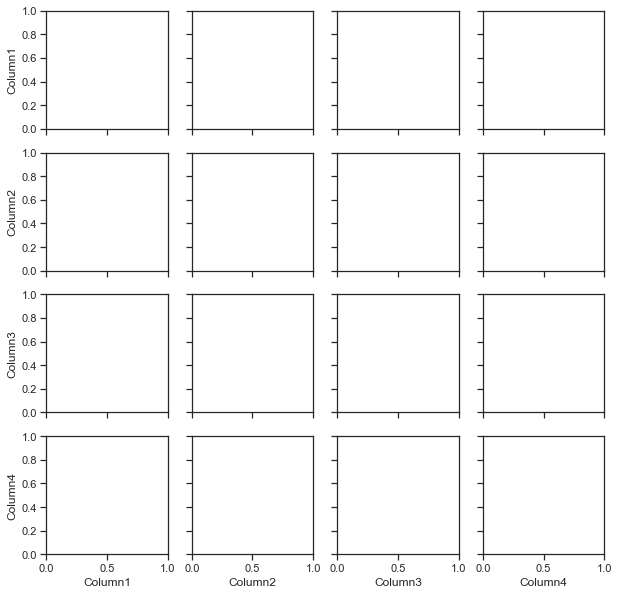

In [48]:
#5. Show the scatter matrix for the selected features (with hue = class column)
#%matplotlib inline
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset,hue="class",vars=dataset.columns[0:4])
plt.show()

In [41]:
#import seaborn as sns; sns.set()
#sns.pairplot(dataset, hue='class', size=1);
#plot.show()

In [70]:
#6. Perform PCA on all standarized numerical features
nr_components=5
pca = PCA(n_components = nr_components).fit(standardizedFeatures)

pcaFeatures = pd.DataFrame(pca.transform(standardizedFeatures))
pcaFeatures


,0,1,2,3,4
0,-4.150955,4.895384,-1.697352,-1.914854,-0.656777
1,-2.563560,4.804695,-0.827996,-1.477078,-0.322834
2,-2.653338,5.035138,-0.532218,-1.225557,-0.049166
3,-0.524966,3.552819,-2.643803,-0.672296,-0.034376
4,0.554189,3.672825,-1.477558,-0.398741,0.204581
...,...,...,...,...,...
1075,4.419346,-0.784647,1.934460,5.268478,-1.015907
1076,3.672633,-1.268877,1.299798,5.324706,-0.471879
1077,6.977456,-1.834747,2.857135,6.275555,-0.246876
1078,5.880329,-2.021917,3.197363,6.521200,-0.626535


In [71]:

print(pd.DataFrame(pca.components_))
print(pd.DataFrame(pca.explained_variance_))
print(pca.explained_variance_ratio_)

         0         1         2         3         4         5         6   \
0 -0.048753 -0.076190 -0.192749 -0.190488 -0.173469 -0.136466 -0.143077   
1  0.220416  0.227324  0.078686  0.078907  0.100370 -0.139539 -0.127891   
2 -0.079631 -0.043517 -0.046451  0.045054  0.045549 -0.089790 -0.111813   
3 -0.024167 -0.008053  0.012415 -0.066796 -0.139986  0.140790  0.105664   
4  0.113713  0.089615 -0.058291 -0.026858 -0.074750  0.147607  0.158373   

         7         8         9   ...        67        68        69        70  \
0 -0.105361 -0.170569 -0.092903  ...  0.003363  0.029638  0.004896 -0.086651   
1 -0.110133 -0.028680  0.144350  ... -0.111140  0.009452  0.006541 -0.157855   
2  0.031742  0.018152 -0.108655  ...  0.068498 -0.005495 -0.015866  0.204052   
3  0.052858  0.121181 -0.081335  ...  0.117303  0.105146  0.031562 -0.067647   
4 -0.025656  0.102762  0.123855  ...  0.028498 -0.152607 -0.162299  0.013311   

         71        72        73        74        75        76  
0  0

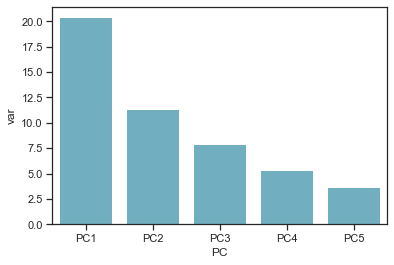

In [80]:
#7. Using a bar plot, show the variance explained by the first k principal components (with k = 1 to numberOfFeatures)

#df=pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5']})
df1=pd.DataFrame({'var':pca.explained_variance_,'PC':['PC1','PC2','PC3','PC4','PC5']})

#sns.barplot(x='PC',y='var', data=df, color="c")
sns.barplot(x='PC',y='var', data=df1, color="c")